In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm
from sklearn.metrics import recall_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [55]:
df_test = pd.read_csv("test_dataset_test.csv")
df_train = pd.read_csv("train_dataset_train.csv")

In [56]:
df_train

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,Пропуск FacePay,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,15005
1091017,1091018,141174B366F14A8703903813A49374DB,Пропуск FacePay,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,Пропуск FacePay,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,Пропуск FacePay,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014


In [57]:
df_test

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
0,1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1,1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
2,1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
3,1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
4,1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39
...,...,...,...,...,...,...,...,...,...,...
561885,1652907,B6FADEB8705FAF8E9DFD9016A613D997,Пропуск FacePay,279,Калужская (Южный),6007,Калужская,6,Калужско-Рижская,2022-09-19 01:33:11
561886,1652908,77F2868FC2648ACCBD58F1F8AB66C321,Пропуск FacePay,2463,Кунцевская БКЛ (Первый),11020,Кунцевская,11,Большая кольцевая,2022-09-19 02:03:59
561887,1652909,29A4ACF592877817B8D00D969DFDB681,Пропуск FacePay,64,Проспект Вернадского ( Южный ),1012,Проспект Вернадского,1,Сокольническая,2022-09-19 02:51:34
561888,1652910,DE9EBEFD0DF4A351013AA574B075F535,Пропуск FacePay,285,Коньково (Южный),6009,Коньково,6,Калужско-Рижская,2022-09-19 02:58:10


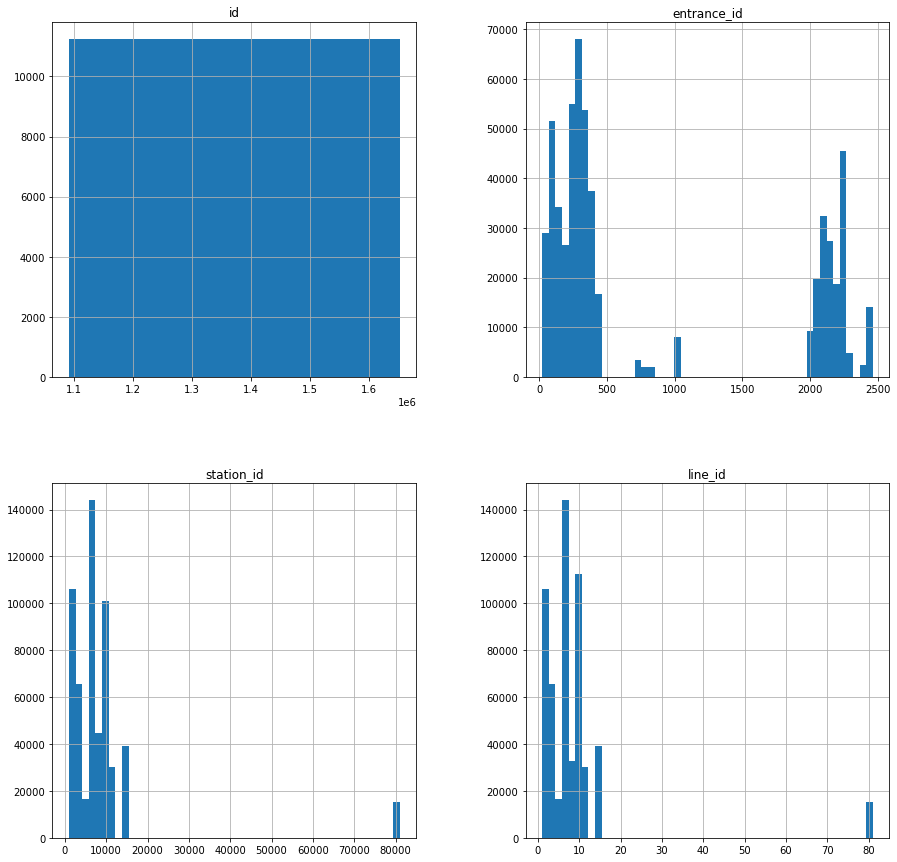

In [58]:
df_test.hist(bins = 50, figsize=(15,15))
plt.show()

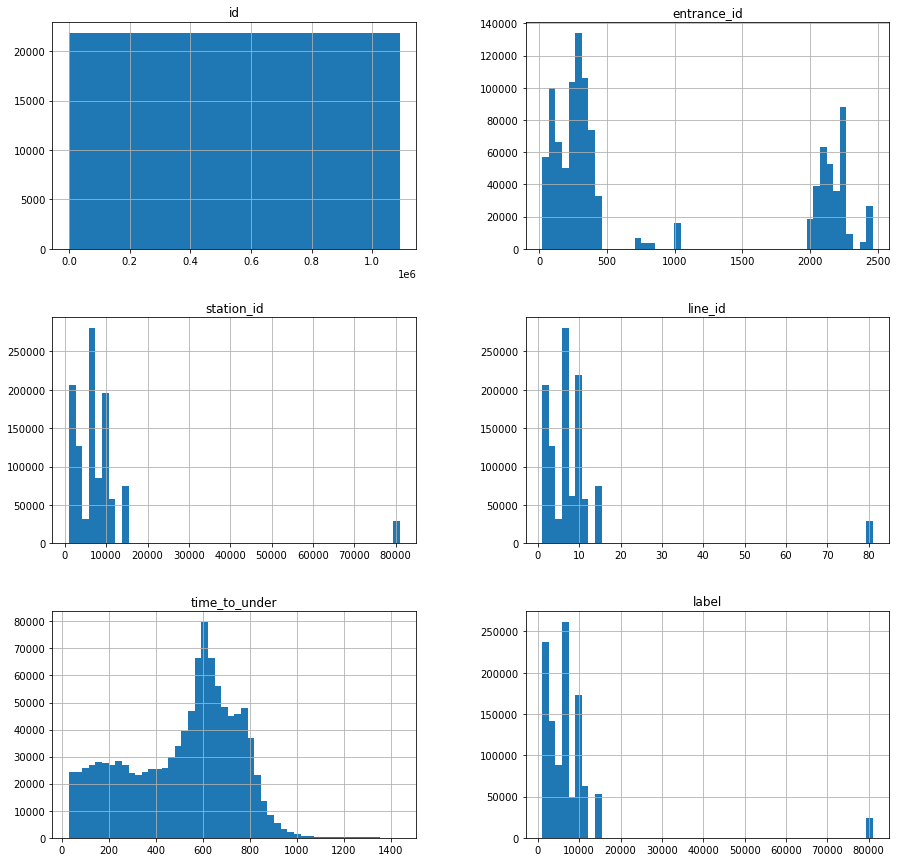

In [59]:
df_train.hist(bins = 50, figsize=(15,15))
plt.show()

In [60]:
df_train["ticket_type_nm"] = pd.Categorical(df_train["ticket_type_nm"])
df_train["ticket_type_nm"].astype('category').cat.codes
df_train["ticket_type_nm"] = df_train["ticket_type_nm"].cat.codes

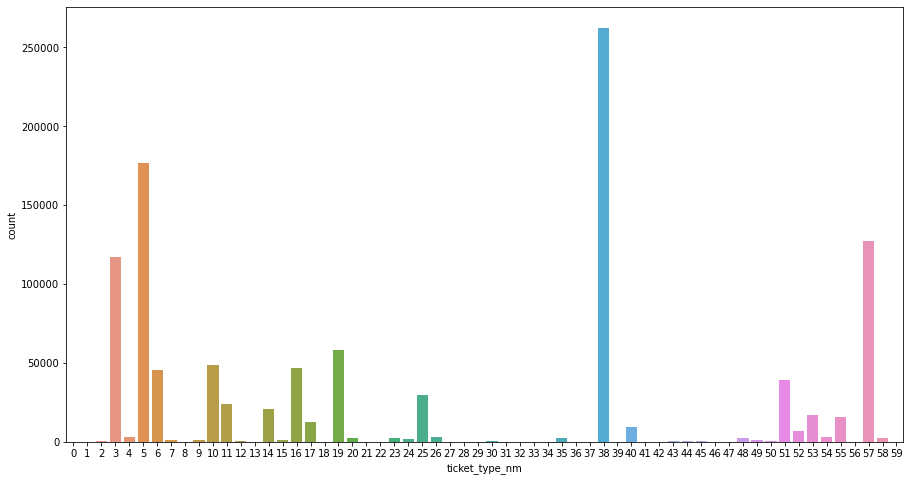

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(x = "ticket_type_nm" , data  = df_train)  
plt.show()

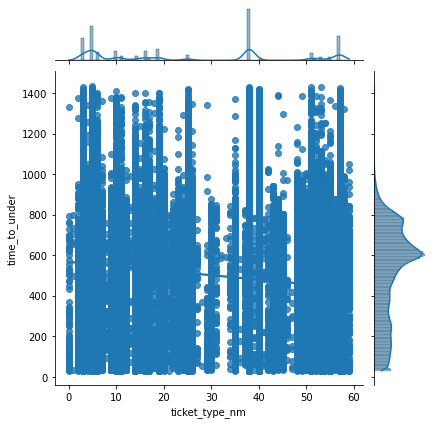

In [62]:
sns.jointplot(x = "ticket_type_nm", y = 'time_to_under', data = df_train, kind = 'reg')
plt.show()

In [63]:
df_train["day"] = df_train.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df_train["hours"] = df_train.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

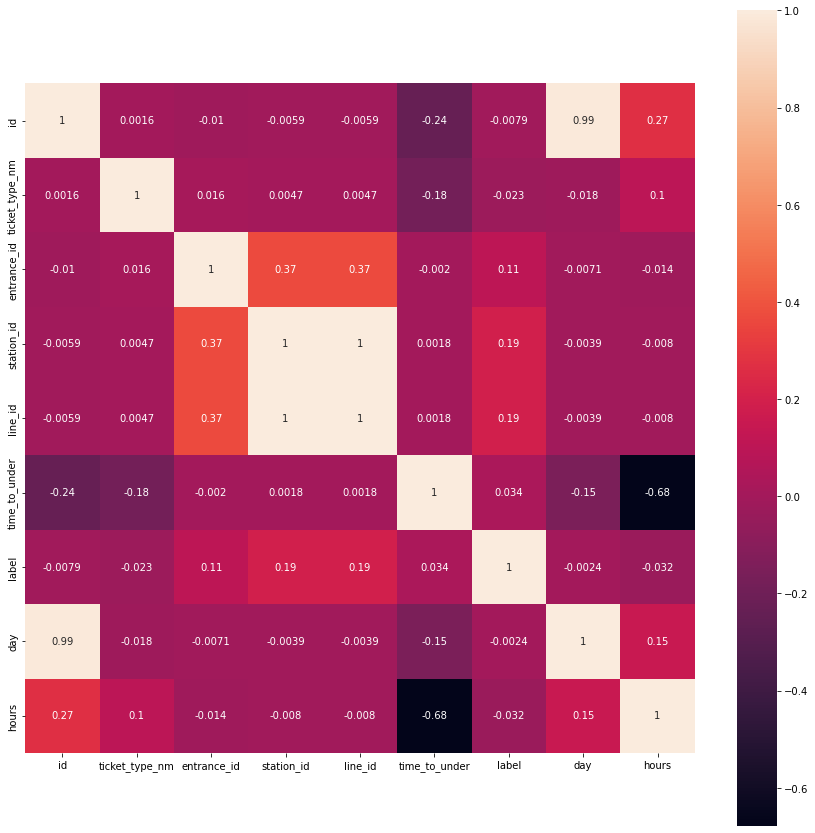

In [64]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [65]:
df_train.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours
0,1,40BD89EC85646EFB69E283F39C298E60,40,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5
1,2,126727A96489CC976A8C08E5CEB00542,53,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,38,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5


In [189]:
X = df_train.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under"], axis = 1)
y = df_train[["time_to_under", "label"]]

In [190]:
STATE = np.random.seed(42)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=STATE)

## Обучение модели

### Деревья

Для станции 

In [69]:
best_model = None
best_result = 0

In [70]:
param_grid = {'n_estimators': list(range(1, 20)), 'max_depth': list(range(1, 20))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestClassifier(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'], n_jobs=-1)
    model.fit(X_train, y_train["label"])
    pred_class = model.predict(X_test)
    score = recall_score(y_test["label"], pred_class , average='macro')
    if score > best_result:
        best_result = score
        best_model = model 

  0%|          | 0/361 [00:00<?, ?it/s]

In [71]:
print('Лучшая модель:', best_model)
print('Лучний результат, recall:', best_result)

Лучшая модель: RandomForestClassifier(max_depth=16, n_estimators=18, n_jobs=-1)
Лучний результат, recall: 0.07198562574050994


In [72]:
best_model_label = best_model
label_metric = best_result

Для времени

In [73]:
best_model = None
best_result = 0

In [74]:
param_grid = {'n_estimators': list(range(1, 20)), 'max_depth': list(range(1, 20))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestRegressor(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'], n_jobs=-1)
    model.fit(X_train, y_train["time_to_under"])
    pred_class = model.predict(X_test)
    score = r2_score(y_test["time_to_under"], pred_class)
    if score > best_result:
        best_result = score
        best_model = model 

  0%|          | 0/361 [00:00<?, ?it/s]

In [75]:
print('Лучшая модель:', best_model)
print('Лучний результат, r2:', best_result)

Лучшая модель: RandomForestRegressor(max_depth=12, n_estimators=17, n_jobs=-1)
Лучний результат, r2: 0.5309498656538929


In [76]:
best_model_time_to_under = best_model
time_to_under_metric = best_result

### Оценка точности

In [77]:
score = 0.5 * label_metric +  0.5 * time_to_under_metric
score

0.3014677456972014

## Catboost

Для станции, классификатор

In [299]:
model = CatBoostClassifier(iterations=30,
                           learning_rate=0.1, 
                           depth=2)

fit_model = model.fit(X_train, y_train['label'],
                      verbose=1)

print(fit_model.get_params())

0:	learn: 5.5264471	total: 9.64s	remaining: 4m 39s


KeyboardInterrupt: 

In [294]:
preds_class = model.predict(X_test)

In [295]:
len(y_test["label"].unique())

276

In [296]:
len(pd.DataFrame(preds_class)[0].unique())

61

In [297]:
score = recall_score(y_test["label"], pd.DataFrame(preds_class)[0], average='macro')

In [298]:
print('Лучний результат, recall:', score)

Лучний результат, recall: 0.023656893825319148


Для времени, регрессор

In [232]:
model = CatBoostRegressor(loss_function='RMSE',iterations=5_000,
                          learning_rate=0.001,
                          depth=3,
                          verbose=200)

TypeError: __init__() got an unexpected keyword argument 'plot'

In [233]:
model.fit(X_train,y_train['time_to_under'])

0:	learn: 232.7570029	total: 31.8ms	remaining: 2m 38s


KeyboardInterrupt: 

In [231]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test["time_to_under"], pred)))
r2 = r2_score(y_test["time_to_under"], pred)
print('Testing performance')
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
RMSE: 162.4916
R2: 0.5128


## Проверка на тестовой выборке

In [78]:
df_test

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
0,1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1,1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
2,1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
3,1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
4,1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39
...,...,...,...,...,...,...,...,...,...,...
561885,1652907,B6FADEB8705FAF8E9DFD9016A613D997,Пропуск FacePay,279,Калужская (Южный),6007,Калужская,6,Калужско-Рижская,2022-09-19 01:33:11
561886,1652908,77F2868FC2648ACCBD58F1F8AB66C321,Пропуск FacePay,2463,Кунцевская БКЛ (Первый),11020,Кунцевская,11,Большая кольцевая,2022-09-19 02:03:59
561887,1652909,29A4ACF592877817B8D00D969DFDB681,Пропуск FacePay,64,Проспект Вернадского ( Южный ),1012,Проспект Вернадского,1,Сокольническая,2022-09-19 02:51:34
561888,1652910,DE9EBEFD0DF4A351013AA574B075F535,Пропуск FacePay,285,Коньково (Южный),6009,Коньково,6,Калужско-Рижская,2022-09-19 02:58:10


In [79]:
df_test["ticket_type_nm"] = pd.Categorical(df_test["ticket_type_nm"])
df_test["ticket_type_nm"].astype('category').cat.codes
df_test["ticket_type_nm"] = df_test["ticket_type_nm"].cat.codes

In [80]:
df_test["day"] = df_test.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df_test["hours"] = df_test.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

In [81]:
X_test = df_test.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm"], axis = 1)

In [82]:
best_model_time_to_under.fit(X, y["time_to_under"])

RandomForestRegressor(max_depth=12, n_estimators=17, n_jobs=-1)

In [83]:
predicted_test_time_to_under = best_model_time_to_under.predict(X_test)


In [84]:
predicted_test_time_to_under

array([596.17132316, 602.16474063, 491.6880438 , ...,  67.57210339,
        48.94926083,  47.2594324 ])

In [85]:
best_model_label.fit(X, y["label"])

RandomForestClassifier(max_depth=16, n_estimators=18, n_jobs=-1)

In [86]:
predicted_test_label = best_model_label.predict(X_test)

In [87]:
predicted_test_label

array([6009, 1007, 2003, ..., 1015, 9025, 1007], dtype=int64)

In [88]:
df_unswer = pd.DataFrame(columns=['id','time_to_under','label'])

In [89]:
df_unswer

,id,time_to_under,label


In [90]:
df_unswer['id'] = df_test['id']

In [91]:
df_unswer['time_to_under'] = pd.Series(predicted_test_time_to_under)

In [92]:
df_unswer['label'] = pd.Series(predicted_test_label)

In [93]:
df_unswer.to_csv('hackathon_unswer.csv', index=False) 

In [94]:
df_unswer

,id,time_to_under,label
0,1091022,596.171323,6009
1,1091023,602.164741,1007
2,1091024,491.688044,2003
3,1091025,596.171323,8004
4,1091026,596.171323,6009
...,...,...,...
561885,1652907,48.949261,6007
561886,1652908,42.290000,11020
561887,1652909,67.572103,1015
561888,1652910,48.949261,9025
